<a href="https://colab.research.google.com/github/cantaruttim/Diabetes/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('diabetes.rwrite1.csv', encoding= "utf_8", delimiter=" ")
dataset

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   map     442 non-null    float64
 4   tc      442 non-null    float64
 5   ldl     442 non-null    float64
 6   hdl     442 non-null    float64
 7   tch     442 non-null    float64
 8   ltg     442 non-null    float64
 9   glu     442 non-null    float64
 10  y       442 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 38.1 KB


In [4]:
dataset.isnull().sum()

age    0
sex    0
bmi    0
map    0
tc     0
ldl    0
hdl    0
tch    0
ltg    0
glu    0
y      0
dtype: int64

In [5]:
dataset.columns

Index(['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu',
       'y'],
      dtype='object')

# **Projeto Diabetes**

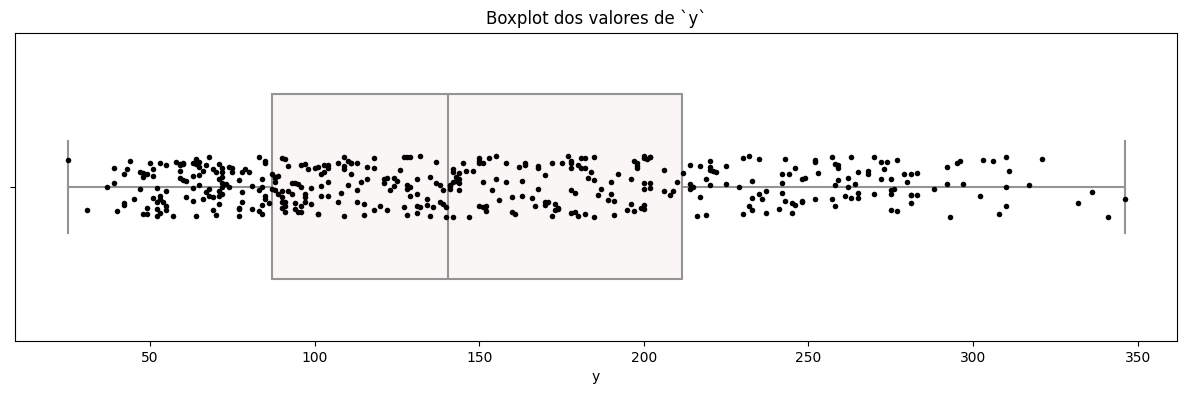

In [6]:
plt.figure(figsize=(15,4))

sns.boxplot(x="y", data=dataset,
            whis=[0, 100], width=.6, palette="vlag");

# Add in points to show each observation
sns.stripplot(x="y", data=dataset,
              size=4, color="0", linewidth=0);

plt.title("Boxplot dos valores de `y`")
plt.show()

In [7]:
dataset[['tc', 'ldl']]

,tc,ldl
0,-0.044223,-0.034821
1,-0.008449,-0.019163
2,-0.045599,-0.034194
3,0.012191,0.024991
4,0.003935,0.015596
...,...,...
437,-0.005697,-0.002566
438,0.049341,0.079165
439,-0.037344,-0.013840
440,0.016318,0.015283


In [8]:
dataset.iloc[:, 4]
print(dataset.iloc[:, 4].shape)

(442,)


In [9]:
dataset.iloc[:, 5]
print(dataset.iloc[:, 5].shape)

(442,)


In [10]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, 4].values
y = dataset.iloc[:, 5].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Reshaping data

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [11]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
pred = reg.predict(X_test)

Coeficiente r²: 0.8422340486802888 



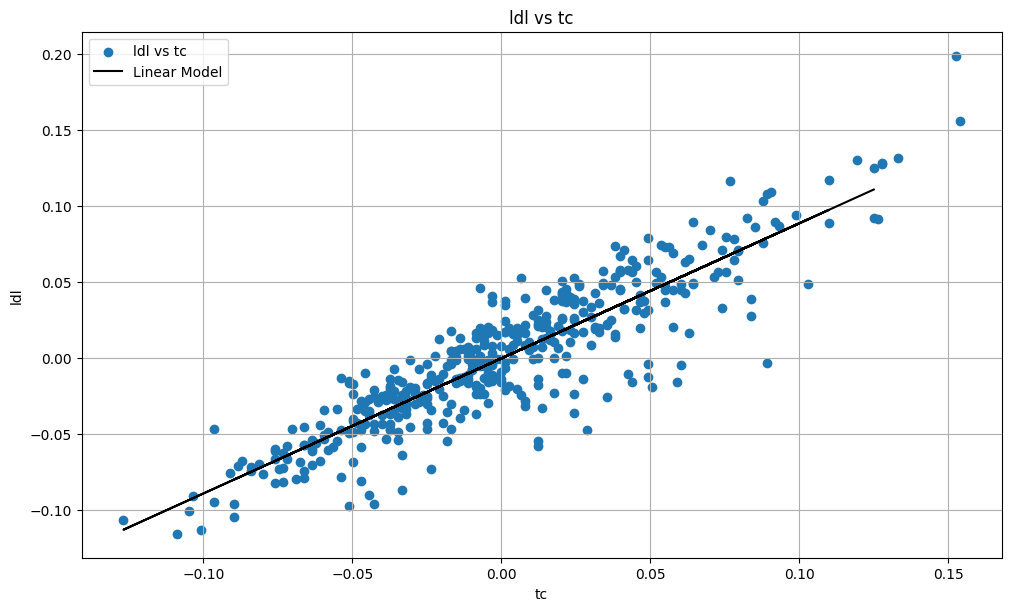

In [12]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, pred)
print(f'Coeficiente r²: {r_squared}', '\n')

##### GRÁFICO #######
### Vamos verificar a linearidade de ldl com tc

f, ax = plt.subplots(figsize=(10, 6), layout='constrained')

ax.scatter(X, y, marker = 'o',
           label = 'ldl vs tc')
ax.plot(X_test, pred, 'black', label = 'Linear Model')

ax.set_xlabel('tc')
ax.set_ylabel('ldl')
ax.set_title("ldl vs tc")

ax.grid(True)
ax.legend(loc = "upper left");
plt.show()

In [13]:
reg.coef_

array([[0.88818032]])

In [14]:
reg.intercept_

array([-0.00031262])

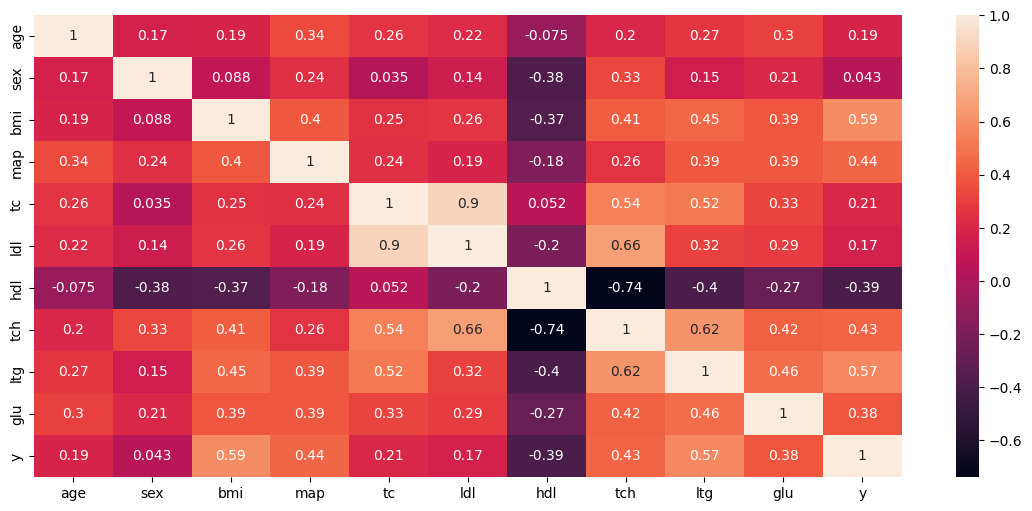

In [15]:
plt.figure(figsize=(14,6))
sns.heatmap(dataset.corr(), annot=True);

In [16]:
X2 = dataset[['bmi', 'ltg']]

In [17]:
X2 = X2.iloc[:, 0:2].values
X2

array([[ 0.06169621,  0.01990842],
       [-0.05147406, -0.06832974],
       [ 0.04445121,  0.00286377],
       [-0.01159501,  0.02269202],
       [-0.03638469, -0.03199144],
       [-0.04069594, -0.04118039],
       [-0.04716281, -0.06291295],
       [-0.00189471, -0.03581673],
       [ 0.06169621, -0.01495648],
       [ 0.03906215,  0.06773633],
       [-0.08380842, -0.06291295],
       [ 0.01750591, -0.09643322],
       [-0.02884001, -0.03075121],
       [-0.00189471,  0.03839325],
       [-0.02560657, -0.03199144],
       [-0.01806189,  0.03605579],
       [ 0.04229559,  0.05228   ],
       [ 0.01211685,  0.02736771],
       [-0.0105172 , -0.01811827],
       [-0.01806189, -0.00894402],
       [-0.05686312, -0.01190068],
       [-0.02237314, -0.07212845],
       [-0.00405033, -0.0611766 ],
       [ 0.06061839,  0.13359898],
       [ 0.03582872, -0.02595242],
       [-0.01267283,  0.01919903],
       [-0.07734155, -0.0425721 ],
       [ 0.05954058, -0.01599827],
       [-0.02129532,

In [18]:
dataset['glu'].values

array([-0.01764613, -0.09220405, -0.02593034, -0.00936191, -0.04664087,
       -0.09634616, -0.03835666,  0.00306441,  0.01134862, -0.01350402,
       -0.03421455, -0.05906719, -0.04249877, -0.01350402, -0.07563562,
       -0.04249877,  0.02791705, -0.0010777 , -0.01764613, -0.05492509,
        0.01549073, -0.01764613, -0.01350402,  0.13561183, -0.05492509,
       -0.03421455, -0.0052198 ,  0.04034337, -0.05492509,  0.05276969,
       -0.00936191, -0.04249877,  0.02791705,  0.00306441, -0.06735141,
        0.01963284, -0.02593034, -0.0052198 ,  0.02377494,  0.00306441,
        0.09419076, -0.00936191, -0.03421455,  0.07348023, -0.01764613,
       -0.05078298, -0.08806194, -0.08391984, -0.02178823, -0.01350402,
        0.00720652, -0.02178823, -0.01350402,  0.04862759,  0.00720652,
        0.00720652, -0.01764613, -0.06735141, -0.05078298,  0.01963284,
       -0.03421455,  0.01963284, -0.02593034, -0.07149352,  0.01134862,
        0.01549073,  0.01963284,  0.00306441,  0.00306441,  0.01

In [19]:
y2 = dataset.iloc[:, 10].values
y2

array([151,  75, 141, 206, 135,  97, 138,  63, 110, 310, 101,  69, 179,
       185, 118, 171, 166, 144,  97, 168,  68,  49,  68, 245, 184, 202,
       137,  85, 131, 283, 129,  59, 341,  87,  65, 102, 265, 276, 252,
        90, 100,  55,  61,  92, 259,  53, 190, 142,  75, 142, 155, 225,
        59, 104, 182, 128,  52,  37, 170, 170,  61, 144,  52, 128,  71,
       163, 150,  97, 160, 178,  48, 270, 202, 111,  85,  42, 170, 200,
       252, 113, 143,  51,  52, 210,  65, 141,  55, 134,  42, 111,  98,
       164,  48,  96,  90, 162, 150, 279,  92,  83, 128, 102, 302, 198,
        95,  53, 134, 144, 232,  81, 104,  59, 246, 297, 258, 229, 275,
       281, 179, 200, 200, 173, 180,  84, 121, 161,  99, 109, 115, 268,
       274, 158, 107,  83, 103, 272,  85, 280, 336, 281, 118, 317, 235,
        60, 174, 259, 178, 128,  96, 126, 288,  88, 292,  71, 197, 186,
        25,  84,  96, 195,  53, 217, 172, 131, 214,  59,  70, 220, 268,
       152,  47,  74, 295, 101, 151, 127, 237, 225,  81, 151, 10

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state=42)

# Reshaping data

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

## Treinando um Regressor Linear

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X2, y2)

LinearRegression()

In [22]:
pred = reg.predict(X_test)

In [23]:
regressor.score(X2, y2)

0.4594852440167805

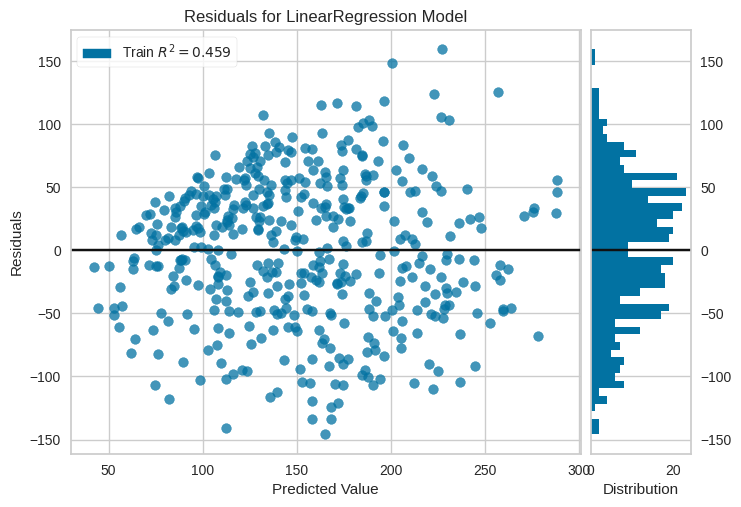

In [24]:
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(regressor)
visualizador.fit(X2, y2)
visualizador.poof() ;

## Treinando um Elastic Net

In [25]:
from sklearn.linear_model import ElasticNet

elastic_regr = ElasticNet(random_state=0).fit(X2, y2)

In [26]:
elastic_pred = reg.predict(X_test)
elastic_pred

array([[-0.00582462],
       [ 0.02849394],
       [ 0.03246704],
       [-0.02030748],
       [-0.00391004],
       [ 0.07473443],
       [ 0.04586912],
       [ 0.08730315],
       [-0.01826941],
       [-0.00488258],
       [-0.02209858],
       [-0.01931406],
       [ 0.15117118],
       [ 0.0295807 ],
       [ 0.04012537],
       [ 0.06558374],
       [-0.08049336],
       [ 0.02105042],
       [ 0.01332121],
       [-0.02762524],
       [-0.02975691],
       [-0.02336305],
       [-0.05177461],
       [ 0.03778649],
       [-0.05464649],
       [-0.08374441],
       [ 0.01236392],
       [ 0.04113056],
       [-0.04986003],
       [-0.01545796],
       [ 0.00470558],
       [-0.04065462],
       [ 0.06310036],
       [ 0.06488877],
       [ 0.07841703],
       [ 0.02571143],
       [ 0.0248087 ],
       [-0.02762524],
       [ 0.05161287],
       [ 0.01923095],
       [ 0.03438162],
       [ 0.05984946],
       [-0.03837253],
       [-0.02336305],
       [-0.04411628],
       [-0

In [27]:
elastic_regr.score(X2, y2)

0.004545720296209921

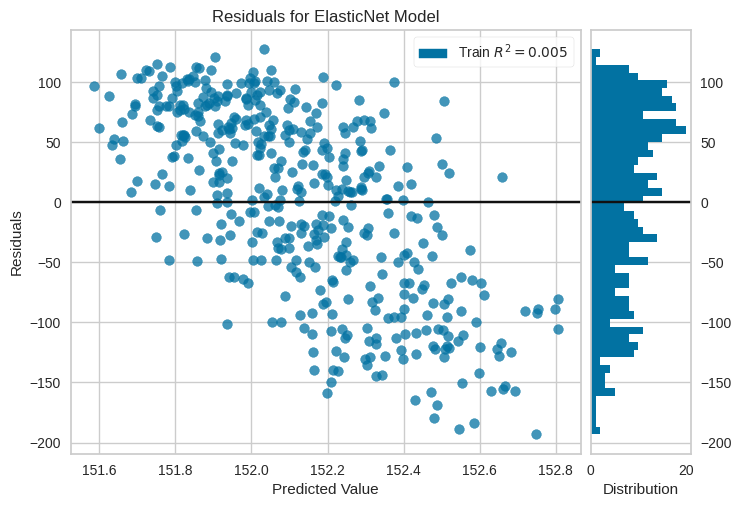

In [28]:
visualizador = ResidualsPlot(elastic_regr)
visualizador.fit(X2, y2)
visualizador.poof() ;

# **Agrupamento**

-- Vamos encontrar os pacientes semelhantes para esse conjunto de dados

In [29]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [30]:
dataset.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135


In [31]:
X = dataset.iloc[:, 0:10].values # todas as colunas

agrupamento = KMeans(n_clusters=3, random_state=1)
agrupamento.fit(X)

dataset['Groups'] = agrupamento.labels_
dataset.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y,Groups
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151,2
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75,1
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141,2
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206,2
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135,1


In [32]:
np.unique(agrupamento.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([122, 161, 159]))

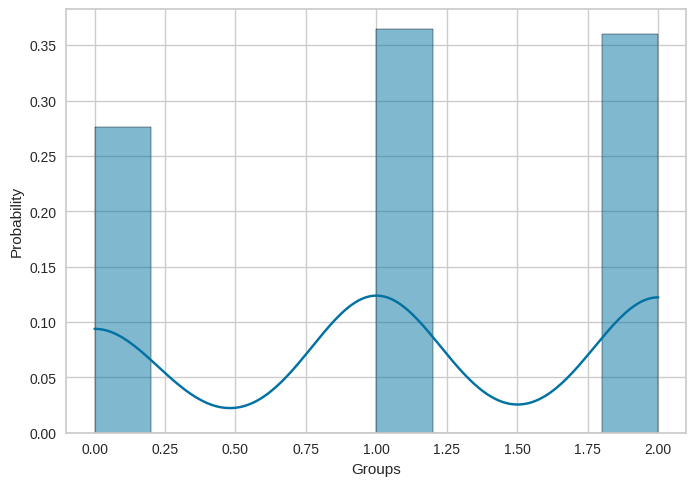

In [33]:
import seaborn as sns

sns.histplot(dataset['Groups'], kde = True, stat = 'probability');

In [34]:
y = dataset['Groups'].values
y

array([2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0,
       2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 2, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1,
       2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0, 2,
       2, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1,
       2, 0, 1, 0, 2, 1, 0, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2, 2,
       1, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2,

In [35]:
dataset2 = dataset[['age', 'sex', 'bmi', 'glu', 'Groups']]

In [36]:
dataset2.head()

,age,sex,bmi,glu,Groups
0,0.038076,0.050680,0.061696,-0.017646,2
1,-0.001882,-0.044642,-0.051474,-0.092204,1
2,0.085299,0.050680,0.044451,-0.025930,2
3,-0.089063,-0.044642,-0.011595,-0.009362,2
4,0.005383,-0.044642,-0.036385,-0.046641,1


In [37]:
X = dataset2.iloc[:, 0:4].values
X

array([[ 0.03807591,  0.05068012,  0.06169621, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 ,  0.00306441]])

In [38]:
y = dataset2.iloc[:, 4].values
y

array([2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0,
       2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 2, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1,
       2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0, 2,
       2, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1,
       2, 0, 1, 0, 2, 1, 0, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2, 2,
       1, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2,

In [39]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [40]:
dados_X_normalizados = StandardScaler()
dados_X_normalizados = dados_X_normalizados.fit_transform(X)

dados_X_normalizados

array([[ 0.80050009,  1.06548848,  1.29708846, -0.37098854],
       [-0.03956713, -0.93853666, -1.08218016, -1.93847913],
       [ 1.79330681,  1.06548848,  0.93453324, -0.54515416],
       ...,
       [ 0.87686984,  1.06548848, -0.33441002,  0.32567395],
       [-0.9560041 , -0.93853666,  0.82123474, -0.54515416],
       [-0.9560041 , -0.93853666, -1.53537419,  0.06442552]])

In [41]:
kmeans_normalizados = KMeans(n_clusters=4, algorithm="elkan")
kmeans_normalizados.fit(dados_X_normalizados)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(algorithm='elkan', n_clusters=4)

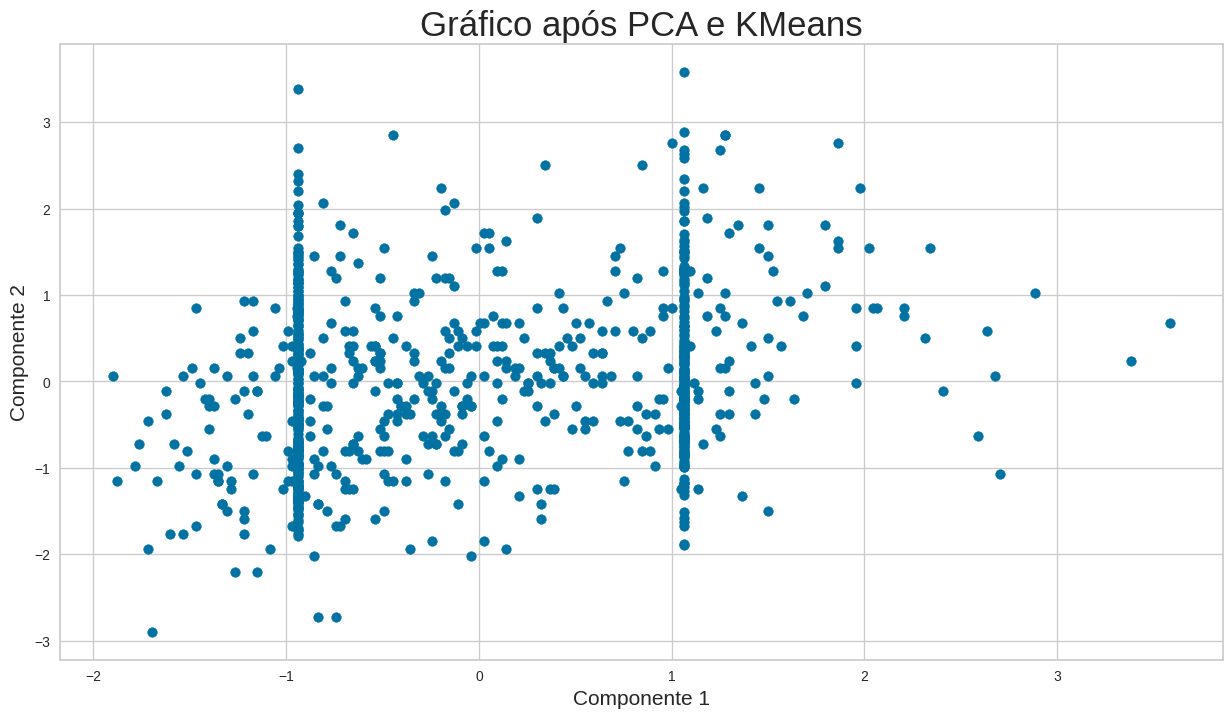

In [42]:
plt.figure(figsize=(15,8))

plt.scatter(x = dados_X_normalizados[:,1:3], y = dados_X_normalizados[:, 2:4])
plt.title("Gráfico após PCA e KMeans", fontsize = 25)
plt.xlabel("Componente 1", fontsize = 15)
plt.ylabel("Componente 2", fontsize = 15)

plt.grid(True)
plt.show()

In [43]:
centroides = kmeans_normalizados.cluster_centers_
rotulos = kmeans_normalizados.labels_

In [44]:
centroides, rotulos

(array([[ 0.68253611,  1.06548848,  0.55680412,  0.74087235],
        [-0.78063653, -0.93853666, -0.78005082, -0.86526412],
        [ 0.36212571, -0.93853666,  0.51024372,  0.37435804],
        [-0.40131857,  1.06548848, -0.45176342, -0.39023842]]),
 array([0, 1, 0, 1, 1, 1, 3, 0, 0, 1, 1, 3, 1, 3, 1, 3, 2, 0, 1, 1, 1, 3,
        1, 0, 1, 3, 1, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 0, 3, 0, 1, 3, 2,
        0, 3, 1, 1, 3, 3, 2, 0, 1, 2, 2, 1, 2, 1, 1, 0, 1, 3, 3, 1, 0, 3,
        3, 0, 3, 2, 1, 2, 0, 3, 0, 3, 3, 1, 1, 1, 2, 3, 1, 1, 1, 2, 3, 2,
        3, 1, 2, 2, 2, 1, 1, 1, 0, 2, 3, 1, 2, 3, 1, 0, 2, 3, 1, 2, 0, 0,
        0, 2, 1, 0, 2, 3, 0, 2, 3, 2, 1, 2, 0, 0, 2, 3, 1, 3, 1, 2, 0, 1,
        0, 3, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 3, 3, 2, 2, 0, 3,
        0, 0, 1, 3, 1, 2, 1, 0, 2, 0, 2, 1, 3, 2, 0, 2, 3, 1, 0, 3, 0, 2,
        0, 2, 2, 1, 3, 1, 0, 0, 2, 3, 3, 1, 2, 1, 2, 3, 3, 0, 1, 0, 1, 0,
        1, 2, 2, 3, 0, 0, 0, 2, 0, 2, 2, 3, 1, 2, 2, 1, 1, 0, 0, 2, 1, 1,
        3,

In [45]:
grafico1 = px.scatter(x = dados_X_normalizados[:,2], y = dados_X_normalizados[:,3], color=rotulos)
grafico2 = px.scatter(x = centroides[:,1], y = centroides[:,3], size = [7, 7, 7, 7])
grafico3 = go.Figure(data = grafico1.data + grafico2.data)
grafico3.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



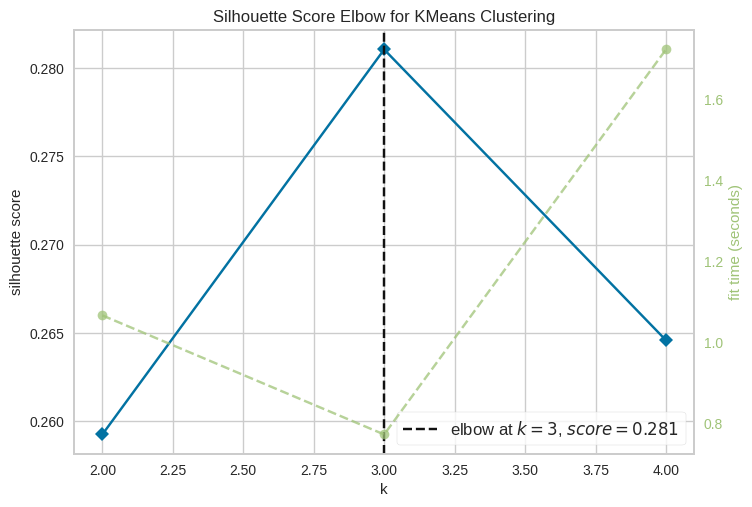

In [46]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(kmeans_normalizados)
visualizer = KElbowVisualizer(model, k=4, metric="silhouette")

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() ;